In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
from modules.stn import STN
from modules.gridgen import CylinderGridGen, AffineGridGen
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

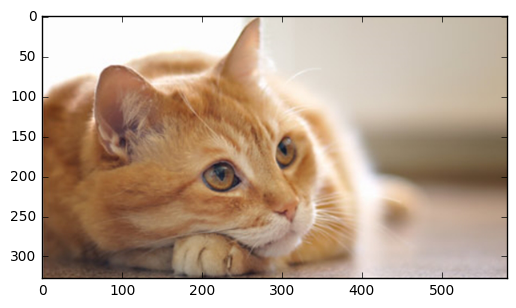

In [2]:
img = Image.open('cat.jpg').convert('RGB')
img = np.array(img)/255.0
plt.imshow(img)

In [3]:
img_batch = np.expand_dims(img, 0)
inputImages = torch.from_numpy(img_batch.astype(np.float32))
inputImages.size()
s = STN()
g = AffineGridGen(328, 582)
input = Variable(torch.from_numpy(np.array([[[1, 0.5, 0], [0.5, 1, 0]]], dtype=np.float32)), requires_grad = True)
#print input
out = g(input)
input1 = Variable(inputImages)
res = s(input1, out)
res = res.data.numpy()

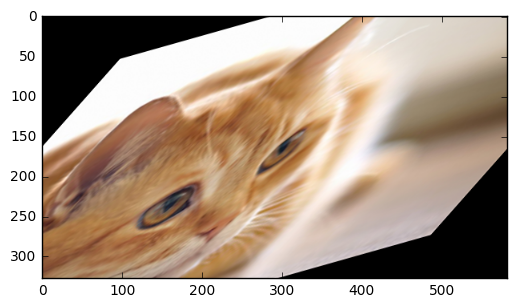

In [4]:
plt.imshow(res[0])

In [5]:
target = Variable(torch.from_numpy(res))

In [6]:
print input1.size(), target.size()

torch.Size([1, 328, 582, 3]) torch.Size([1, 328, 582, 3])


In [7]:
crt = nn.L1Loss()

In [8]:
crt.forward(input1, target)

Variable containing:
 0.2754
[torch.FloatTensor of size 1]

In [9]:
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.s = STN()
        self.g = AffineGridGen(328, 582, lr = 0.01)
    def forward(self,input1, input2):
        out = self.g(input2)
        out2 = self.s(input1, out)
        return out2

In [10]:
t = Transformer()

In [11]:
input1 = input1
input2 = Variable(torch.from_numpy(np.array([[[1, 0.5, 0], [0.5, 1, 0]]], dtype=np.float32) + 0.1*np.random.random((1,2,3)).astype(np.float32)) , requires_grad = True)
crt = nn.L1Loss()

In [12]:
input2

Variable containing:
(0 ,.,.) = 
  1.0189  0.5842  0.0999
  0.5544  1.0630  0.0695
[torch.FloatTensor of size 1x2x3]

In [13]:
for i in range(100):
    out = t(input1, input2)
    err = crt(out, target)
    err.backward()

    input2.data = input2.data - 0.000001*input2.grad.data #gradient descent
    #plt.imshow(out.data.numpy()[0])
    #print err.data[0]


In [14]:
x = np.arange(0.5, 1.5, 0.001)
y = []
g_ = []
for v in x:
    input2 = Variable(torch.from_numpy(np.array([[[1, 0.5, 0], [0.48, v, 0]]], dtype=np.float32)) , requires_grad = True)
    out = t(input1, input2)
    err = crt(out, target)
    err.backward()
    y.append(err.data[0])
    #print input2.grad.size()
    g_.append(input2.grad.data[0,1,1])


In [15]:
y[0]

0.1613789051771164

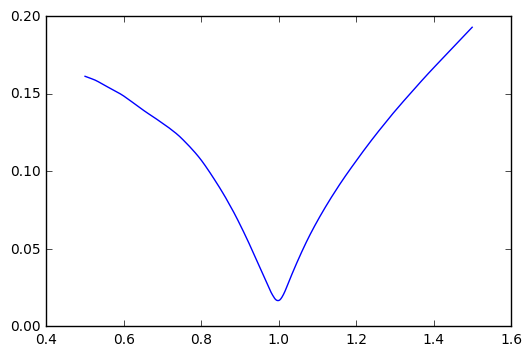

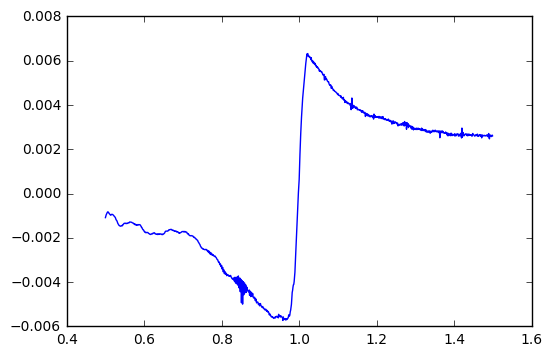

In [16]:
plt.figure()
plt.plot(x,y)
plt.figure()
plt.plot(x,g_)

In [17]:
input2.grad

Variable containing:
(0 ,.,.) = 
1.00000e-03 *
  -0.5076  0.1563 -0.0027
  -0.4354  2.6089  0.7869
[torch.FloatTensor of size 1x2x3]

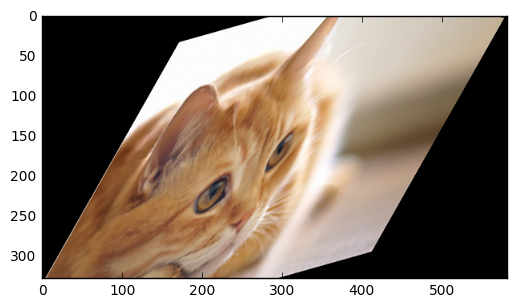

In [18]:
plt.imshow(out.data.numpy()[0])

In [19]:
input2

Variable containing:
(0 ,.,.) = 
  1.0000  0.5000  0.0000
  0.4800  1.4990  0.0000
[torch.FloatTensor of size 1x2x3]

In [20]:
g = CylinderGridGen(64,128)

In [21]:
s = Variable(torch.zeros([1,1]))

In [22]:
s.data.fill_(2.33)


 2.3300
[torch.FloatTensor of size 1x1]

In [23]:
out = g.forward(s)

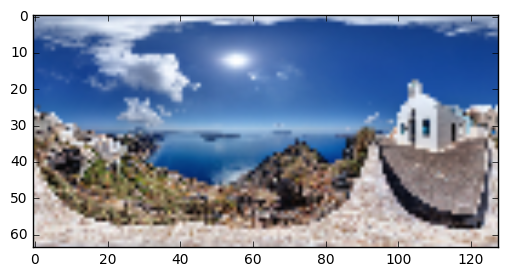

In [25]:
from PIL import ImageFilter
img = Image.open('equi.png').convert('RGB').resize((128,64))
img = np.array(img)/255.0
plt.imshow(img)

In [26]:
input1 = Variable(torch.from_numpy(np.expand_dims(img.astype(np.float32), 0)))

In [27]:
st = STN()

In [28]:
imgout = st(input1, out)

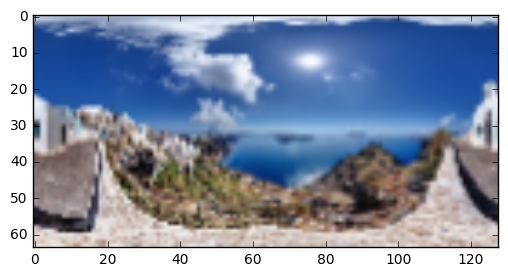

In [29]:
plt.imshow(imgout.data.numpy()[0][:,:,0:3])

In [31]:
class CylinderTransformer(nn.Module):
    def __init__(self):
        super(CylinderTransformer, self).__init__()
        self.s = STN()
        self.g = CylinderGridGen(64, 128, lr = 0.01)
    def forward(self,input1, input2):
        out = self.g(input2)
        out2 = self.s(input1, out)
        return out2

In [32]:
target = imgout

In [33]:
print target.size(), input1.size()

torch.Size([1, 64, 128, 3]) torch.Size([1, 64, 128, 3])


In [34]:
input2 = Variable(torch.from_numpy(np.array([[0.3]], dtype=np.float32)) , requires_grad = True)
crt = nn.L1Loss()

In [35]:
input2

Variable containing:
 0.3000
[torch.FloatTensor of size 1x1]

In [36]:
t = CylinderTransformer()

In [37]:
for i in range(500):
    out = t(input1, input2)
    err = crt(out, target)
    err.backward()

    input2.data = input2.data - 0.0001*input2.grad.data
    #plt.imshow(out.data.numpy()[0])
    #print err.data[0]



In [38]:
input2 = Variable(torch.from_numpy(np.array([[5]], dtype=np.float32)) , requires_grad = True)
out = t(input1, input2)
err = crt(out, target)
err.backward()
print input2.grad

Variable containing:
1.00000e-04 *
 -1.4296
[torch.FloatTensor of size 1x1]



In [39]:
delta = 0.00001
input2 = Variable(torch.from_numpy(np.array([[4]], dtype=np.float32)) , requires_grad = True)
out = t(input1, input2)
err = crt(out, target)
print err
input2 = Variable(torch.from_numpy(np.array([[4 + delta]], dtype=np.float32)) , requires_grad = True)
out = t(input1, input2)
err2 = crt(out, target)
print err2

Variable containing:
1.00000e-02 *
  8.3896
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  8.3904
[torch.FloatTensor of size 1]



In [40]:
(err2 - err)/delta

Variable containing:
 0.7324
[torch.FloatTensor of size 1]

In [41]:
input2

Variable containing:
 4.0000
[torch.FloatTensor of size 1x1]

In [42]:
input2

Variable containing:
 4.0000
[torch.FloatTensor of size 1x1]

In [43]:
x = []
y = []
g_ = []

for i in np.arange(0,5,0.001):
    x.append(i)
    input2 = Variable(torch.from_numpy(np.array([[i]], dtype=np.float32)) , requires_grad = True)
    out = t(input1, input2)
    err = crt(out, target)
    err.backward()
    y.append(err.data[0])
    g_.append(input2.grad.data[0][0])

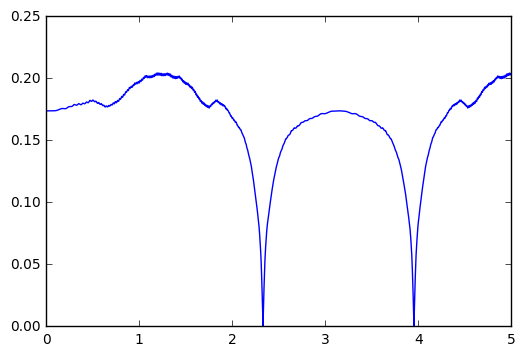

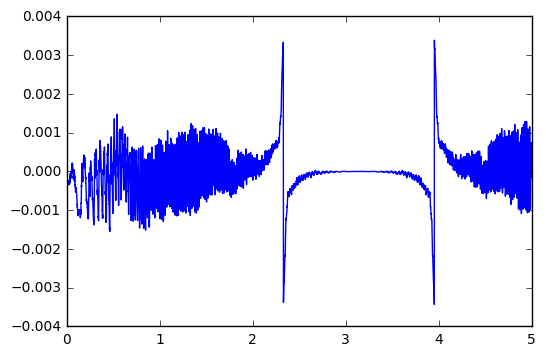

In [44]:
plt.figure()
plt.plot(x,y)
plt.figure()
plt.plot(x,g_)

In [45]:
g__ = []
for i in range(len(np.array(g_))-300):
    g__.append(np.mean(g_[i:i+300]))

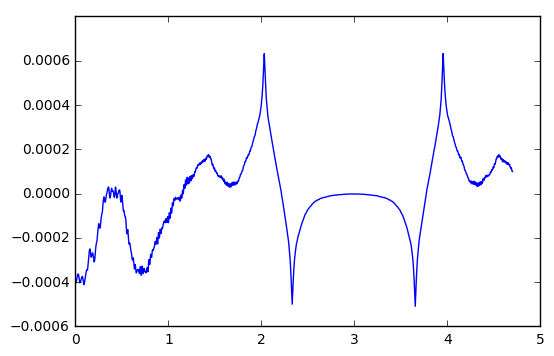

In [46]:
plt.plot(x[:-300], g__)